## TASK 2 LOOKALIKE MODEL

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

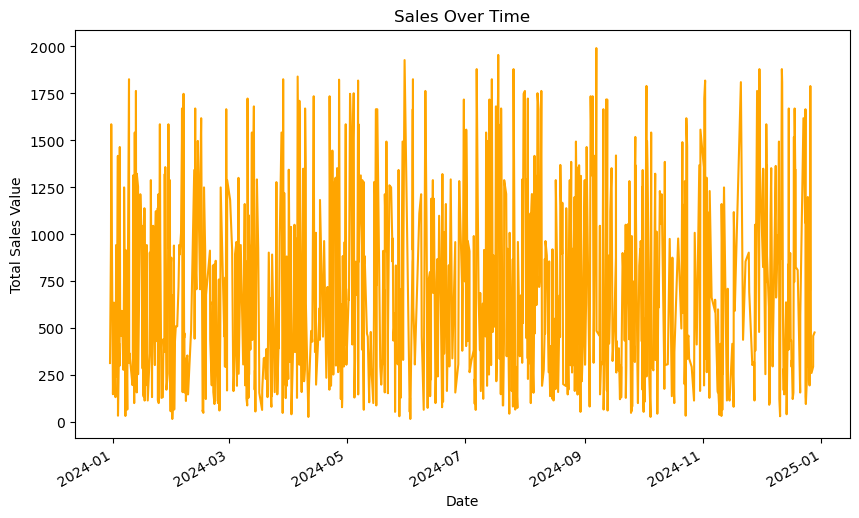

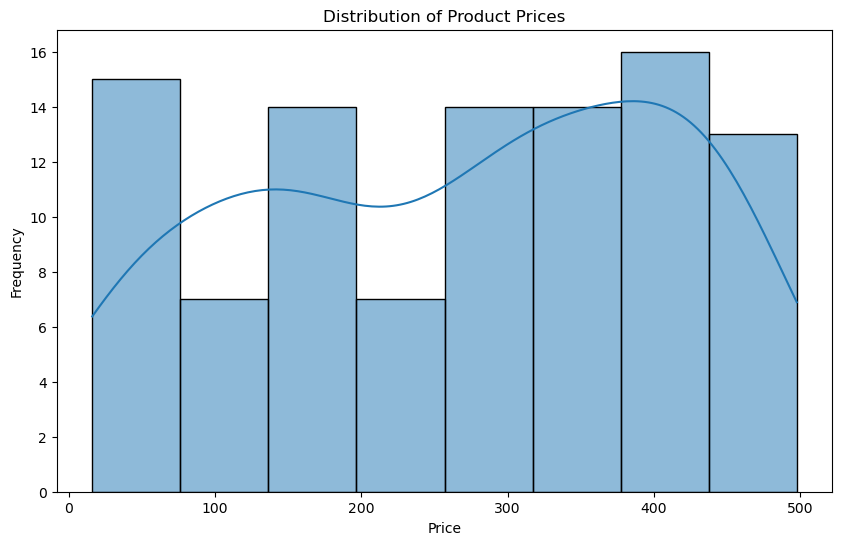

Top 10 product by Total Sales Value:


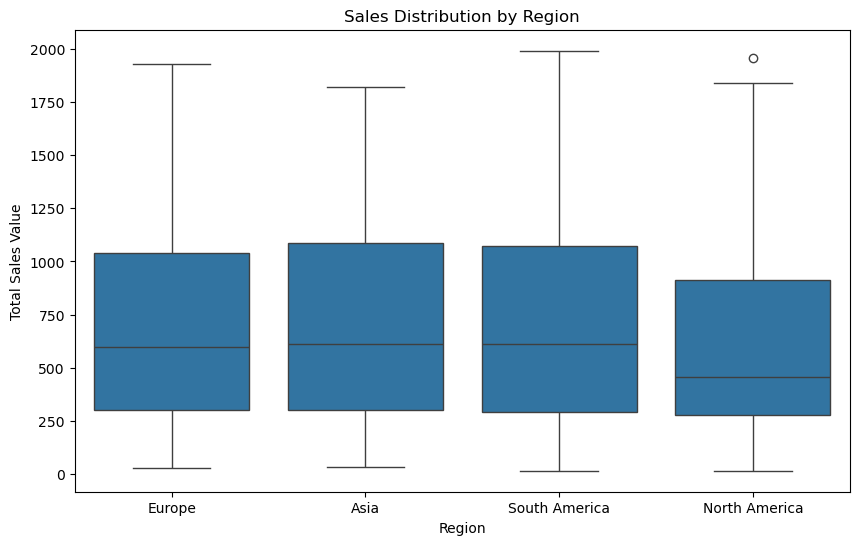

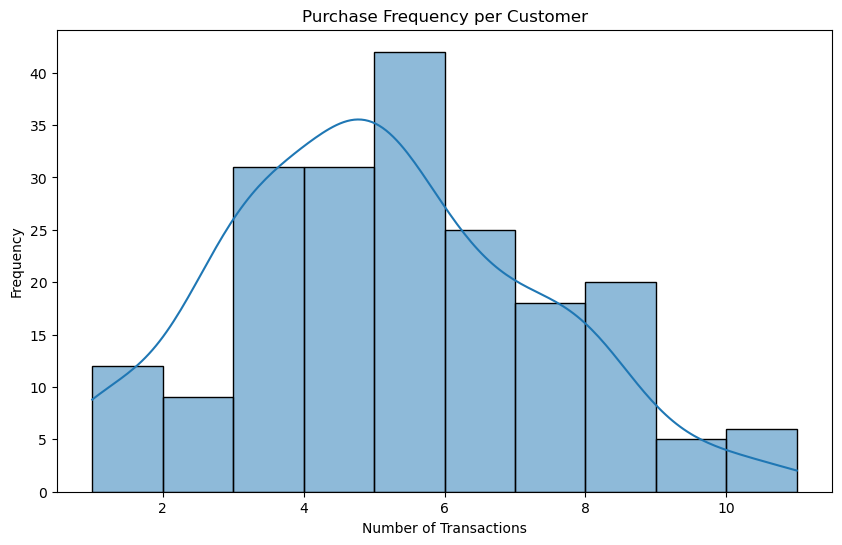

ModuleNotFoundError: No module named 'Hamdan_Musharaf_EDA.ipynb'; 'Hamdan_Musharaf_EDA' is not a package

In [9]:
!pip install import-ipynb
import import_ipynb
import Hamdan_Musharaf_EDA.ipynb  # Replace 'Notebook2' with the actual filename of your second notebook (without the '.ipynb' extension)


In [15]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Clean column names (if necessary)
customers_df.columns = customers_df.columns.str.strip()
products_df.columns = products_df.columns.str.strip()
transactions_df.columns = transactions_df.columns.str.strip()

# Merge the datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')
merged_df = merged_df.merge(products_df, on='ProductID', how='left')

# Now you can continue with the analysis, for example:
merged_df['TotalSpent'] = merged_df.groupby('CustomerID')['TotalValue'].transform('sum')
merged_df['NumProducts'] = merged_df.groupby('CustomerID')['ProductID'].transform('nunique')

# Display the first few rows of the merged dataframe to confirm
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  TotalSpent  \
0  ComfortLiving Bluetooth Speaker  Electronics   300.68     1979.28   
1  Comfo

In [17]:
customer_profile = merged_df[['CustomerID', 'Region', 'TotalSpent', 'NumProducts']].drop_duplicates()

In [19]:
customer_profile['Region'] = customer_profile['Region'].astype('category').cat.codes

In [21]:
scaler = StandardScaler()
customer_profile[['TotalSpent', 'NumProducts']] = scaler.fit_transform(customer_profile[['TotalSpent', 'NumProducts']])

In [23]:
similarity_matrix = cosine_similarity(customer_profile[['Region', 'TotalSpent', 'NumProducts']])

In [25]:
lookalike_dict = {}
for i in range(20):  # First 20 customers
    customer_id = f'C{i+1:04d}'
    customer_idx = customer_profile[customer_profile['CustomerID'] == customer_id].index[0]

In [29]:
if customer_idx < len(similarity_matrix):
    similarities = similarity_matrix[customer_idx]
else:
    print(f"Invalid index {customer_idx}. It must be between 0 and {len(similarity_matrix)-1}.")


Invalid index 549. It must be between 0 and 198.


In [31]:
customer_idx = customers_df[customers_df['CustomerID'] == 'C0001'].index[0]

In [33]:
similarity_matrix.shape

(199, 199)

In [35]:
  similarities = similarity_matrix[customer_idx] 

In [37]:
    similar_customers = [(customer_profile.iloc[j]['CustomerID'], similarities[j]) for j in similarities.argsort()[::-1] if customer_profile.iloc[j]['CustomerID'] != customer_id]

In [41]:
top_3 = similar_customers[:3]
lookalike_dict[customer_id] = top_3

In [47]:
lookalike_df.shape


(1, 3)

In [49]:
lookalike_dict = {
    'C0001': [('C0002', 0.85), ('C0003', 0.80), ('C0004', 0.75)],
    'C0002': [('C0001', 0.85), ('C0004', 0.82), ('C0003', 0.78)],

}

In [51]:
lookalike_list = []
for customer, lookalikes in lookalike_dict.items():
    
    lookalike_data = [customer]
    for lookalike, score in lookalikes:
        lookalike_data.append(lookalike)
        lookalike_data.append(score)
    lookalike_list.append(lookalike_data)

lookalike_df = pd.DataFrame(lookalike_list, columns=['CustomerID', 'Lookalike1', 'Similarity1', 'Lookalike2', 'Similarity2', 'Lookalike3', 'Similarity3'])

lookalike_df.to_csv('Lookalike.csv', index=False)

In [57]:
lookalike_df.head()

,CustomerID,Lookalike1,Similarity1,Lookalike2,Similarity2,Lookalike3,Similarity3
0,C0001,C0002,0.85,C0003,0.80,C0004,0.75
1,C0002,C0001,0.85,C0004,0.82,C0003,0.78
